<a id='dd'></a>
# data download

[libraries](#dd-libraries)  
[parameters](#dd-parameters)  
[directories](#dd-directories)  
[download](#dd-download)  
[catalog](#dd-catalog)  
[paths](#dd-paths)  
[read](#dd-read)   
[explore](#dd-explore)  

<a id='dd-libraries'></a>
## libraries

[Return to Start of Notebook](#dd)  

In [1]:
import os
import glob
import gzip
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import seaborn as sns
import cartopy.crs as ccrs

In [2]:
import warnings 
from functools import partial 
from IPython.core.interactiveshell import InteractiveShell 

In [3]:
from data_download import download_csv
from data_download import download_nc
from data_download import directory_catalog
from data_download import read_raw_data

<a id='dd-parameters'></a>
## parameters

[Return to Start of Notebook](#dd)  

In [4]:
# ignore warnings 
warnings.filterwarnings('ignore')

In [5]:
# shorter traceback error messages
get_ipython().showtraceback = partial(get_ipython().showtraceback,exception_only=True)

In [6]:
# shows result of cell without needing print
InteractiveShell.ast_node_interactivity = "last_expr_or_assign"

In [7]:
%matplotlib inline

In [8]:
plt.rcParams['figure.figsize'] = (6, 3)
plt.rcParams['figure.dpi'] = 144

In [9]:
sns.set_style('darkgrid')

<a id='dd-directories'></a>
## directories

[Return to Start of Notebook](#dd)  

In [10]:
project_id = 'gta'
home_dir = os.path.expanduser("~")
project_dir = os.path.join(home_dir, project_id)
data_dir = os.path.join(project_dir, 'data')
raw_data_dir =os.path.join(data_dir, 'raw-data')

'/Users/rkforest/gta/data/raw-data'

In [11]:
def create_directory(directory_name):
    if not os.path.exists(directory_name):
        print('Created new directory: ', directory_name)
        os.mkdir(directory_name)

In [12]:
create_directory(project_dir)
create_directory(data_dir)
create_directory(raw_data_dir)

In [13]:
os.chdir(project_dir)
os.getcwd()

'/Users/rkforest/gta'

<a id='dd-download'></a>
## download 

[Return to Start of Notebook](#dd)  

#### download csv

In [14]:
download_csv(raw_data_dir, 'GLB')
download_csv(raw_data_dir, 'NH')
download_csv(raw_data_dir, 'SH')
download_csv(raw_data_dir, 'ZonAnn')

current file is latest 2023-04-12
current file is latest 2023-04-12
current file is latest 2023-04-12
current file is latest 2023-04-12


#### download netcdf

In [15]:
download_nc(raw_data_dir)

current file is latest 2023-04-12


<a id='dd-catalog'></a>
## catalog

[Return to Start of Notebook](#dd)  

In [16]:
df = directory_catalog(raw_data_dir, 'csv')

,directory,file,"rows, cols"
0,raw-data,GLB.Ts+dSST.csv,"(144, 19)"
1,raw-data,NH.Ts+dSST.csv,"(144, 19)"
2,raw-data,SH.Ts+dSST.csv,"(144, 19)"
3,raw-data,ZonAnn.Ts+dSST.csv,"(142, 15)"


In [17]:
df = directory_catalog(raw_data_dir, 'nc')

,directory,file,dimensions
0,raw-data,gistemp1200_GHCNv4_ERSSTv5.nc,"(time, lat, lon)"


<a id='dd-paths'></a>
## paths

[Return to Start of Notebook](#dd)  

In [18]:
file_paths_csv =  sorted(glob.glob(os.path.join(raw_data_dir, '*.csv')))
[print(path) for path in file_paths_csv];

/Users/rkforest/gta/data/raw-data/GLB.Ts+dSST.csv
/Users/rkforest/gta/data/raw-data/NH.Ts+dSST.csv
/Users/rkforest/gta/data/raw-data/SH.Ts+dSST.csv
/Users/rkforest/gta/data/raw-data/ZonAnn.Ts+dSST.csv


In [19]:
file_paths_nc  =  sorted(glob.glob(os.path.join(raw_data_dir, '*.nc')))
[print(path) for path in file_paths_nc];

/Users/rkforest/gta/data/raw-data/gistemp1200_GHCNv4_ERSSTv5.nc


<a id='dd-read'></a>
## read

[Return to Start of Notebook](#dd)  

#### csv

In [20]:
dfg = read_raw_data(file_paths_csv[0], skiprows=1);
dfn = read_raw_data(file_paths_csv[1], skiprows=1);
dfs = read_raw_data(file_paths_csv[2], skiprows=1);
dfz = read_raw_data(file_paths_csv[3]);

<a id='dd-explore'></a>
## explore

[Return to Start of Notebook](#dd)  

### tabular data

#### as dataframes

In [21]:
dfg.head(1)

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON
0,1880,-0.18,-0.24,-.08,-.16,-.10,-.21,-.18,-.10,-.14,-.23,-.21,-.17,-.17,***,***,-.11,-.16,-.20


In [22]:
dfg.tail(1)

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON
143,2023,0.86,0.97,***,***,***,***,***,***,***,***,***,***,***,***,.88,***,***,***


In [23]:
dfz.head(1)

,Year,Glob,NHem,SHem,24N-90N,24S-24N,90S-24S,64N-90N,44N-64N,24N-44N,EQU-24N,24S-EQU,44S-24S,64S-44S,90S-64S
0,1880,-0.17,-0.29,-0.04,-0.37,-0.12,-0.02,-0.8,-0.48,-0.29,-0.16,-0.09,-0.04,0.05,0.66


#### as array

In [24]:
file_path = os.path.join(raw_data_dir, file_paths_csv[0]) 
glb2d = np.genfromtxt(file_path,
                    skip_header=2,
                    usecols=(1,2,3,4,5,6,7,8,9,10,11,12),
                    delimiter = ",")
glb2d[0], glb2d[-1]

(array([-0.18, -0.24, -0.08, -0.16, -0.1 , -0.21, -0.18, -0.1 , -0.14,
        -0.23, -0.21, -0.17]),
 array([0.86, 0.97,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
         nan]))

#### histogram

In [25]:
glb1d = glb2d.flatten(); # required for histogram

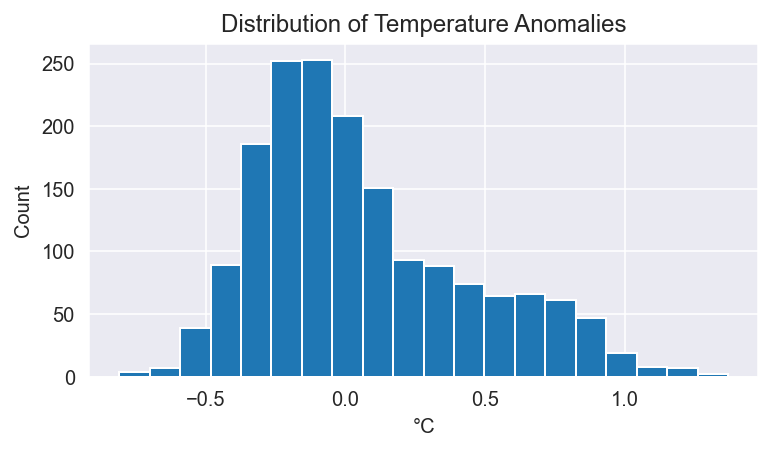

In [26]:
fig, ax = plt.subplots()

ax.hist(glb1d, bins=20)

ax.set(title = "Distribution of Temperature Anomalies",
       xlabel = "°C",
       ylabel = "Count")

plt.show()

#### colormesh

In [27]:
file_path = os.path.join(raw_data_dir, file_paths_csv[0]) 
yrs = np.loadtxt(file_path,
                 skiprows=2,
                 usecols=(0),
                 delimiter = ",")
yr_beg = int(yrs[0])
yr_end = int(yrs[-1])
yr_beg, yr_end

(1880, 2023)

In [28]:
xlabel = "Years: " + str(yr_beg) + "-" + str(yr_end)

'Years: 1880-2023'

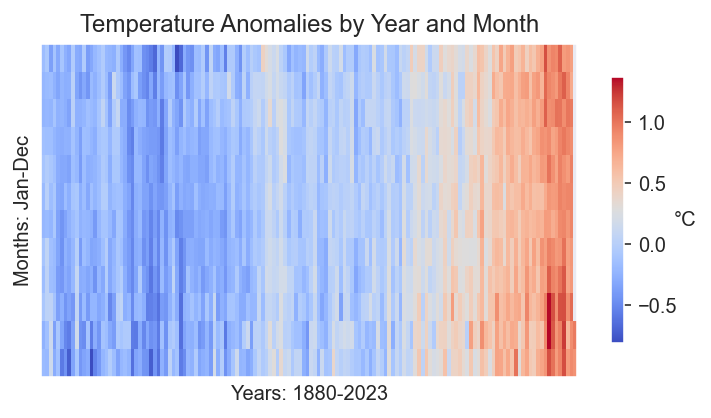

In [29]:
fig, ax = plt.subplots()

im = ax.pcolormesh(glb2d.T,cmap='coolwarm')

ax.set(title = "Temperature Anomalies by Year and Month",
       ylabel = "Months: Jan-Dec",
       xlabel = xlabel)

ax.set_xticks([])
ax.set_yticks([])

cbar = fig.colorbar(im, shrink=0.8)
cbar.set_label('°C',  rotation=0)

plt.show()

### grid data

#### xarray dataset

In [30]:
gz = gzip.open(file_paths_nc[0], 'rb')
ds = xr.open_dataset(gz)

<xarray.Dataset>
Dimensions:      (lat: 90, lon: 180, time: 1718, nv: 2)
Coordinates:
  * lat          (lat) float32 -89.0 -87.0 -85.0 -83.0 ... 83.0 85.0 87.0 89.0
  * lon          (lon) float32 -179.0 -177.0 -175.0 -173.0 ... 175.0 177.0 179.0
  * time         (time) datetime64[ns] 1880-01-15 1880-02-15 ... 2023-02-15
Dimensions without coordinates: nv
Data variables:
    time_bnds    (time, nv) datetime64[ns] ...
    tempanomaly  (time, lat, lon) float32 ...
Attributes:
    title:        GISTEMP Surface Temperature Analysis
    institution:  NASA Goddard Institute for Space Studies
    source:       http://data.giss.nasa.gov/gistemp/
    Conventions:  CF-1.6
    history:      Created 2023-03-12 11:33:56 by SBBX_to_nc 2.0 - ILAND=1200,...

#### global grid

##### select first year

In [31]:
first_ds = ds.isel(time=0)
first_date_header = first_ds.coords['time'].values
first_date_timestamp = pd.to_datetime(first_date_header)
first_date_str = str(first_date_timestamp.date())

'1880-01-15'

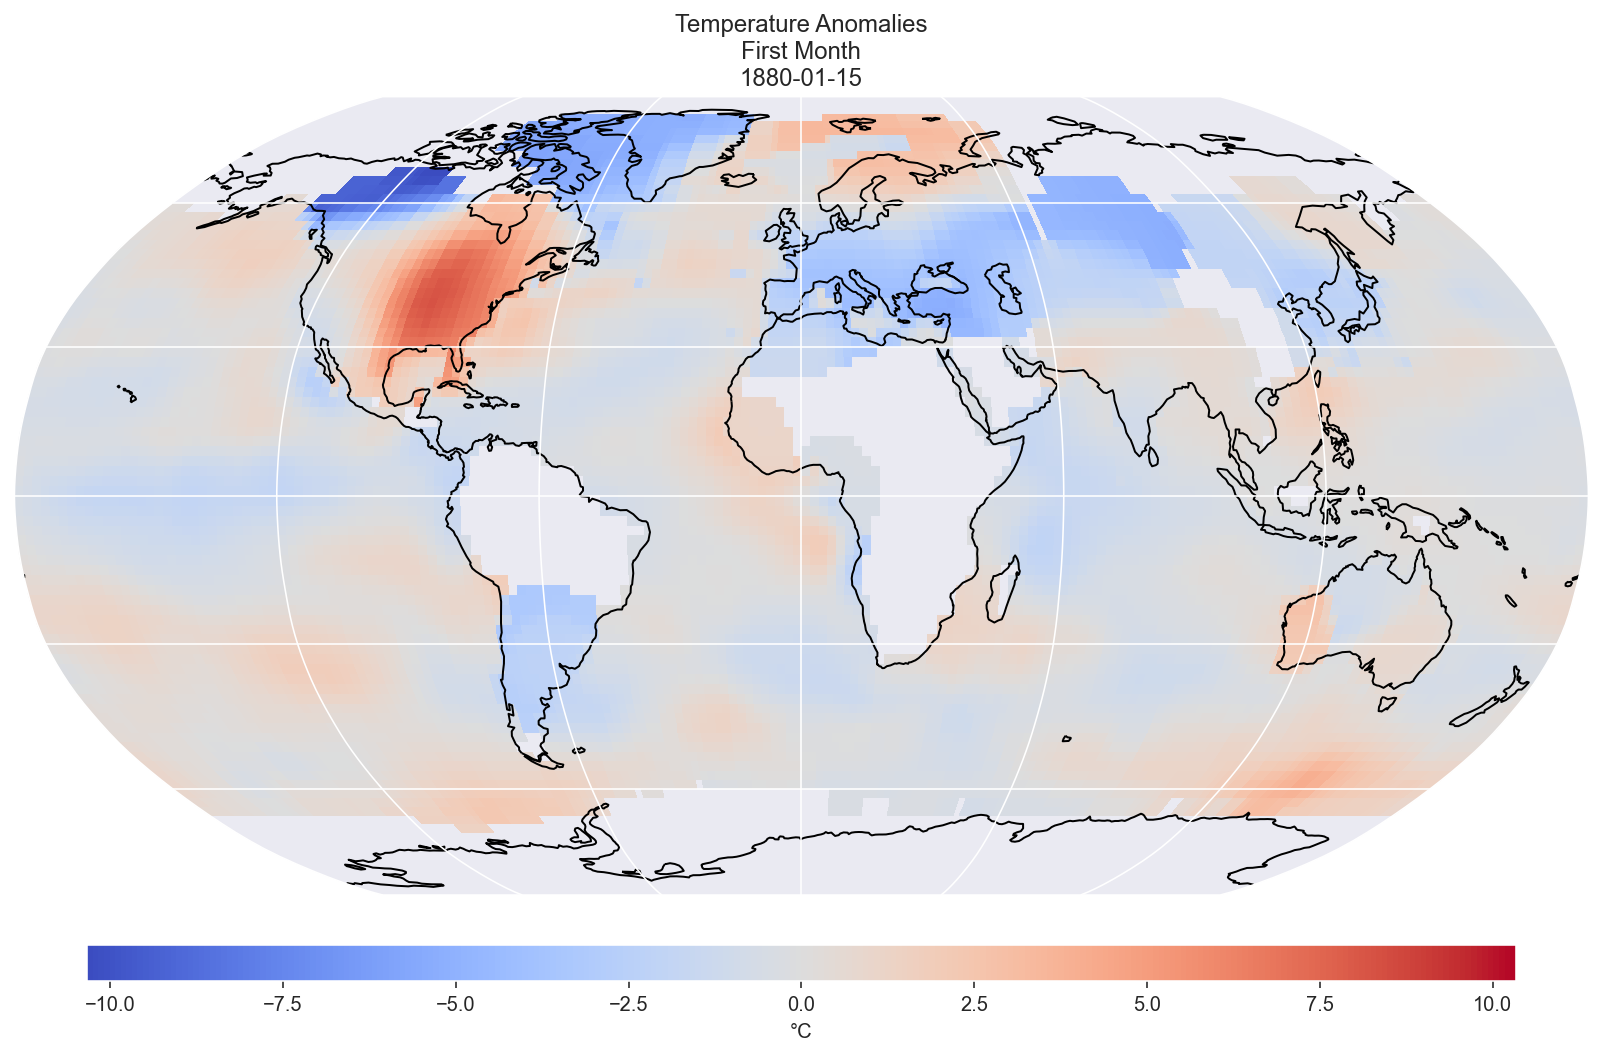

In [32]:
fig = plt.figure(figsize=(16,9))

ax = plt.axes(projection=ccrs.Robinson())
ax.coastlines()
ax.gridlines()

title_str = 'Temperature Anomalies\nFirst Month\n' + first_date_str

cbar_kwargs = {'orientation':'horizontal',
               'shrink':0.8,
               "pad" : .05,
               'aspect':40,
               'label':"°C"}

first_ds['tempanomaly'].plot(ax=ax,
        transform=ccrs.PlateCarree(),
        cbar_kwargs=cbar_kwargs,
        cmap='coolwarm')

ax.set_title(title_str);

##### select latest month

In [33]:
latest_ds = ds.isel(time=-1)
latest_date_header = latest_ds.coords['time'].values
latest_date_timestamp = pd.to_datetime(latest_date_header)
latest_date_str = str(latest_date_timestamp.date())

'2023-02-15'

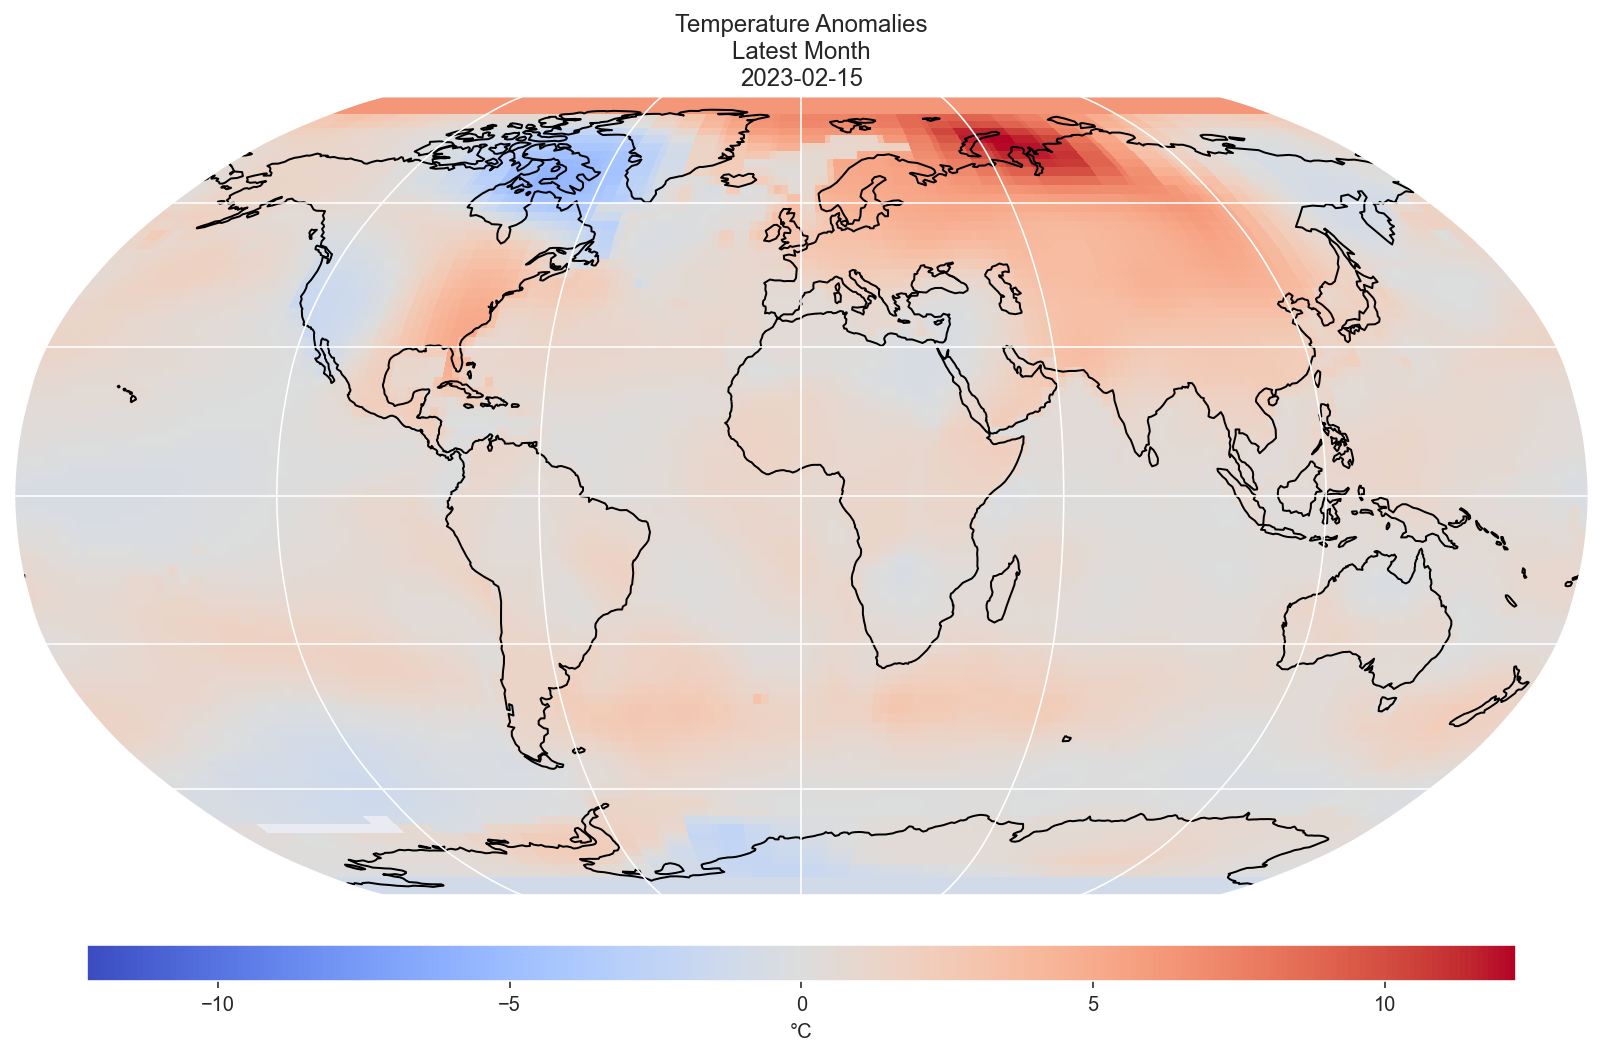

In [34]:
fig = plt.figure(figsize=(16,9))

ax = plt.axes(projection=ccrs.Robinson())
ax.coastlines()
ax.gridlines()

title_str = 'Temperature Anomalies\nLatest Month\n' + latest_date_str

cbar_kwargs = {'orientation':'horizontal',
               'shrink':0.8,
               "pad" : .05,
               'aspect':40,
               'label':"°C"}

latest_ds['tempanomaly'].plot(ax=ax,
        transform=ccrs.PlateCarree(),
        cbar_kwargs=cbar_kwargs,
        cmap='coolwarm')

ax.set_title(title_str);